# 06 Confidence Intervals and Hypothesis Testing


## Yoga for Kids

![alt text](https://ih0.redbubble.net/image.412709073.7698/raf,360x360,075,t,fafafa:ca443f4786.jpg "Avatar Aang (Anime: Avatar the Last Airbender) Designed by ToradoraTaiga")_Avatar Aang (Anime: Avatar the Last Airbender) Designed by ToradoraTaiga_


Some people claim children who practice yoga are more physically fit, self-confident, and self-aware. A random sample of pre-teens (ages 10–12) practicing yoga was obtained and their meditation (or quiet breathing)  times (in minutes) per day were recorded.

[Purdue Lab 06](http://www.stat.purdue.edu/~lfindsen/stat350/Lab6SAS.pdf)

In [31]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style
import statsmodels.api as sm #QQ plot

In [32]:
yoga = [17.3, 7.7, 4.9, 4.3, 4.6, 2.9, 2.5, 6.1, 2.8, 7.1, 3.9, 2.4, 12.1,
        1.7, 9.0, 3.5, 7.6, 4.9, 8.3, 12.7, 1.9, 5.6, 10.6, 3.7, 7.4, 4.4,
        2.1, 6.6, 5.1, 13.9]


In [33]:
mu = np.mean(yoga)
sigma = np.std(yoga)


### Checking Normality

> Make a boxplot, histogram, and Normal quantile plot to determine if there any systematic departures from normality.

In [44]:
def plot_hist(data, mean=0, std=1, num_bins = 50):

    fig, ax = plt.subplots(figsize=(15,8))

    # the histogram of the data
    n, bins, patches = ax.hist(data, num_bins, density=1)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    ax.plot(bins, y, '--')
    #ax.set_xlabel('Smarts')
    #ax.set_ylabel('Probability density')
    #ax.set_title(r'Histogram of pig Weights: $\mu={}$, $\sigma={}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()

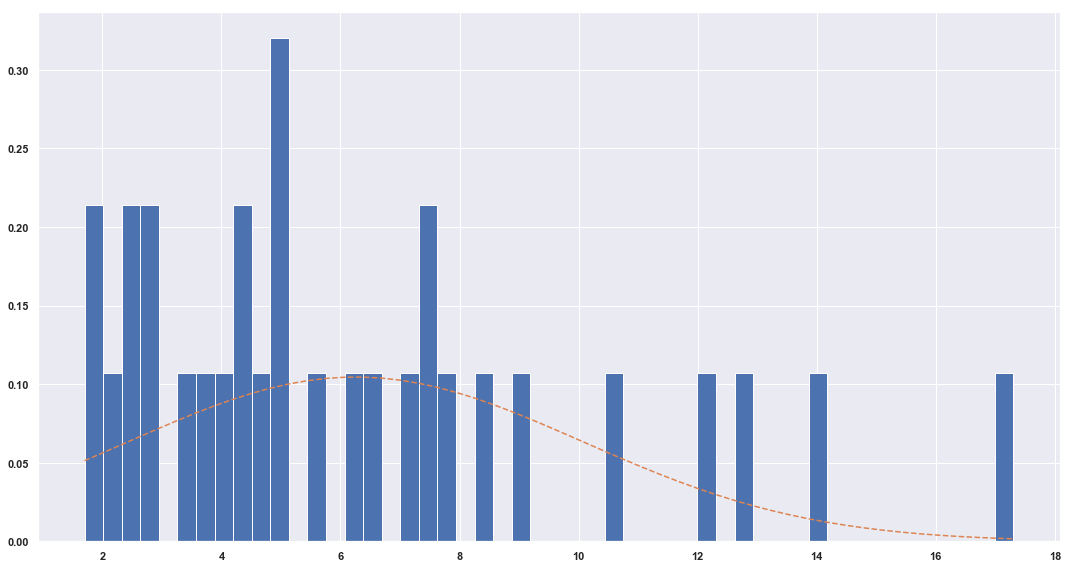

In [45]:
plot_hist(yoga, mean = mu, std = sigma)

The histogram is right skewed indicating a non-normality distribution, __assumptions are deviated from the normal distribution.__

{'whiskers': [<matplotlib.lines.Line2D at 0x10bfd7b9278>,
 'caps': [<matplotlib.lines.Line2D at 0x10bfe0edf98>,
 'boxes': [<matplotlib.lines.Line2D at 0x10bfe0ed160>],
 'medians': [<matplotlib.lines.Line2D at 0x10bfe0f7898>],
 'fliers': [<matplotlib.lines.Line2D at 0x10bfe0f7cf8>],
 'means': []}

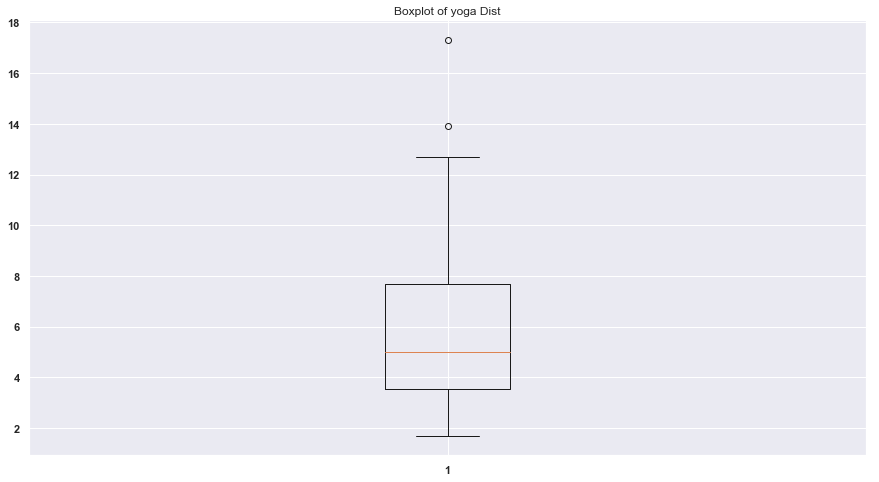

In [46]:
# Plot Distributions
fig = plt.figure(figsize=(15,8))
plt.title('Boxplot of yoga Dist')
plt.boxplot(yoga)

The box plot appears to be positiviely skewed with 2 notable outliers pulling the mean higher than the median. 

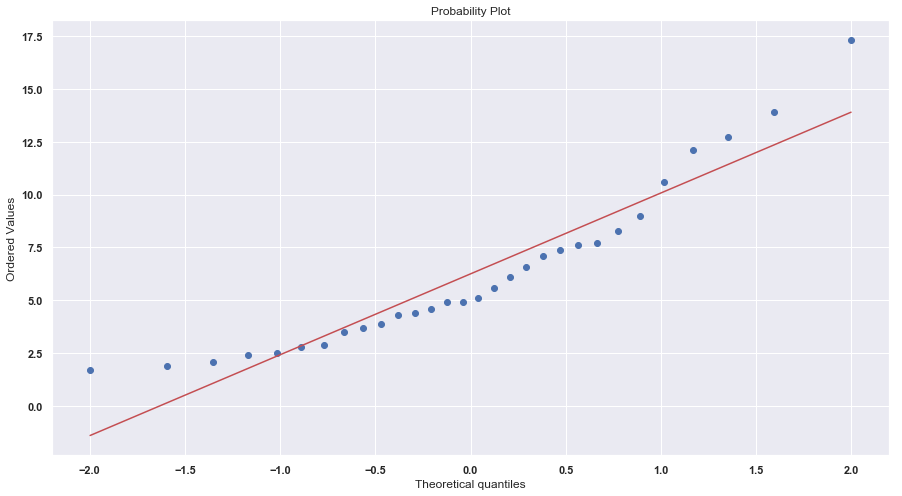

In [47]:
fig = plt.figure(figsize=(15,8))
plt.title('QQ plot yoga')
import scipy.stats as stats
stats.probplot(yoga, plot=plt)
plt.show()

The QQ Plot displays the observations have a low slope near the center, but the low slow ends near the end indicating the S-shaped probability plot. __The QQ plot suggest important deviations from normality.__

> Make a log transformation of the data. Make a boxplot, histogram and Normal quantile
plot to verify that the log transformation of the distribution is roughly symmetric with
no outliers and to confirm normality.

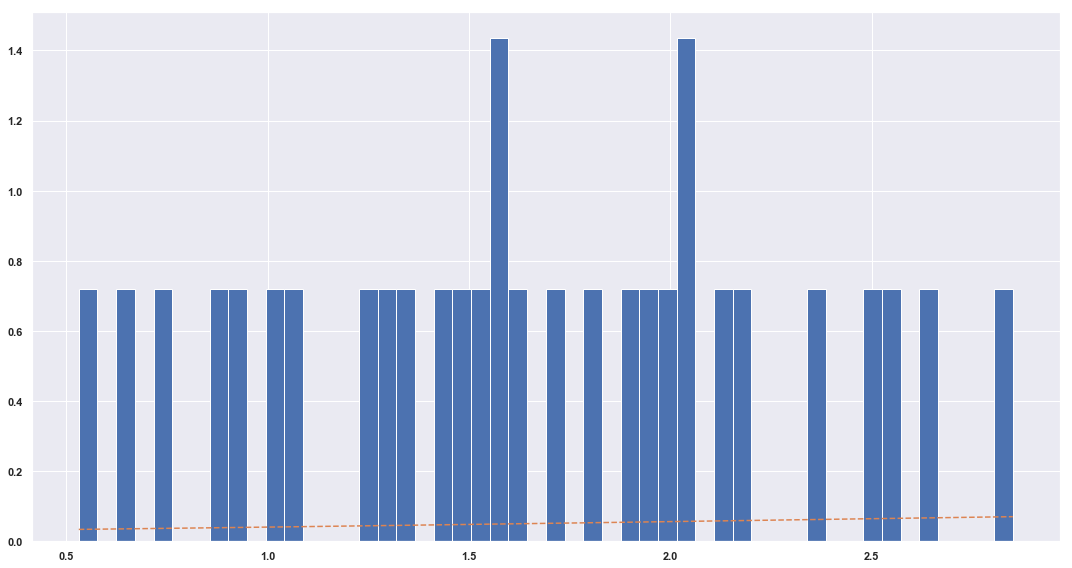

In [72]:
#log districbution
yoga_log = np.log(yoga)

# hist
plot_hist(yoga_log, mean = mu_ln, std = sigma_ln)

The hist appears to be normally distributed indicating __distribution is appropriately normal__

{'whiskers': [<matplotlib.lines.Line2D at 0x10bfea687f0>,
 'caps': [<matplotlib.lines.Line2D at 0x10bfcc39cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x10bfcc39e10>],
 'medians': [<matplotlib.lines.Line2D at 0x10bfddcf860>],
 'fliers': [<matplotlib.lines.Line2D at 0x10bfddcffd0>],
 'means': []}

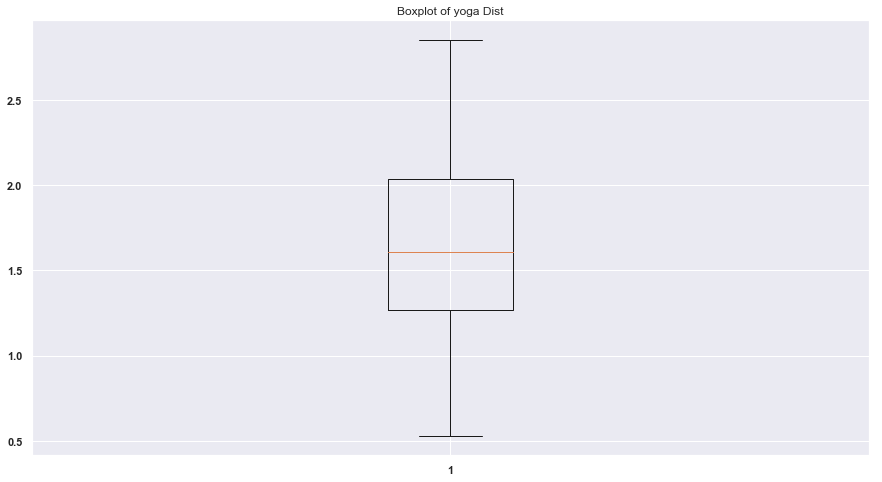

In [73]:
# Plot Distributions
fig = plt.figure(figsize=(15,8))
plt.title('Boxplot of yoga Dist')
plt.boxplot(yoga_log)

box plot appears to be normal without any outlieres indicating __distribution is appropriately normal__

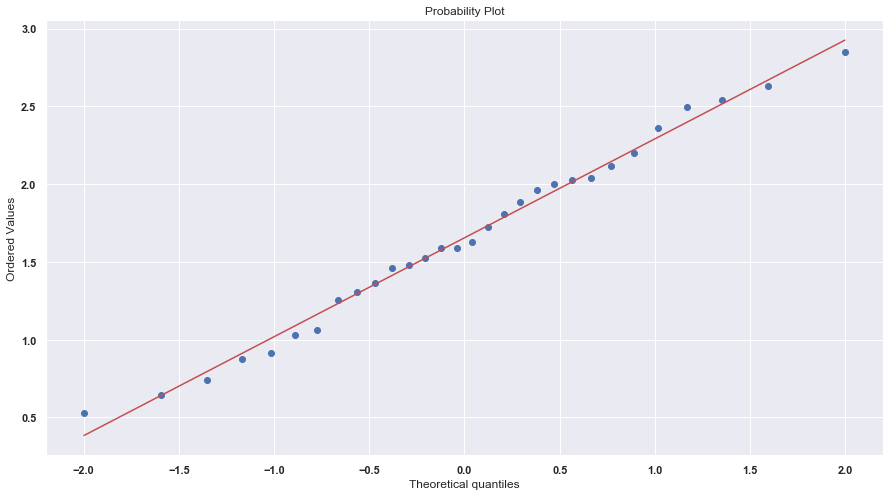

In [74]:
fig = plt.figure(figsize=(15,8))
plt.title('QQ plot yoga')
import scipy.stats as stats
stats.probplot(yoga_log, plot=plt)
plt.show()

The observations on the probability plot appear to be aligned wih the linear line indicating __distribution is appropriately normal__

>From your observations in parts b), is it appropriate to use the t- procedure for the
transformed data?

Because normality was deviated in the original data, when transformaiton on the natrual log occured normality appears to meet the assumption conditions, __therefore we can continue using the t-procedures with the yoga_log__

> Calculate and interpret the 95% lower bound for the mean number of minutes the preteens spent practicing yoga

In [75]:
n = len(yoga_log)
mu_ln = np.mean(yoga_log)
sigma_ln = np.std(yoga_log)
null_ = 0

df_ =  n - 1
se = sigma / np.sqrt(n)

t_value = (mu_ln - null_) / se

t_star = stats.t.ppf([0.975], df = df_)

ci_low = mu_ln - (t_star * se)
ci_high = mu_ln + (t_star * se)


print("t score: ", t_value)
print("Confidence Interval from: {} to {}".format(ci_low, ci_high))
print("Confidence Interval from: {} to {}".format(np.exp(ci_low), np.exp(ci_high)))

t score:  2.374383412732868
Confidence Interval from: [0.22936942] to [3.07978881]
Confidence Interval from: [1.25780662] to [21.75380775]


>Are you convinced that the mean number of minutes that the pre-teens spent
practicing yoga is more than 1.4 log min (4.055 mins)? Carry out a significance
test to justify your answer. Your significance level should be consistent with
what was given in part d).

H0: mu_log = 1.4

Ha: mu_log > 1.4

In [76]:
n = len(yoga_log)
mu_ln = np.mean(yoga_log)
sigma_ln = np.std(yoga_log)
null_ = 1.4

df_ =  n - 1
se = sigma / np.sqrt(n)

t_value = (mu_ln - null_) / se

t_star = stats.t.ppf([0.95], df = df_)

ci_low = mu_ln - (t_star * se)
ci_high = mu_ln + (t_star * se)


print("t score: ", t_value)
print("Confidence Interval from: {} to {}".format(ci_low, ci_high))
print("Confidence Interval from: {} to {}".format(np.exp(ci_low), np.exp(ci_high)))

t score:  0.3653306313954174
Confidence Interval from: [0.47054958] to [2.83860866]
Confidence Interval from: [1.60087376] to [17.09196817]


In [77]:
tt = (mu_ln-null_)/np.sqrt(sigma_ln/float(n))  # t-statistic for mean
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print ('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

t-statistic =  1.794 pvalue = 0.0832


In [78]:
# mu_ln

1.6545791174351812

In [115]:
# t test
def interpret(p_value, alpha_level=0.05):
    if p_value > alpha_level:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

# required statistics
n = len(yoga_log)
df_ =  n - 1
mu = np.mean(yoga_log)
sigma = np.std(yoga_log)
null_ = 1.4
        
# confidence internval
se = sigma / np.sqrt(n)
t_star = stats.t.ppf(0.975, df = df_)

ci_low = mu_ln - (t_star * se)
ci_high = mu_ln + (t_star * se)
    
        
# one sample t test
stat, p = stats.ttest_1samp(yoga_log, null_)
print('Statistics=%.3f, p=%.3f' % (stat, (p/2))) #(stat, p) if only for = we divide by 2 for ><
interpret(p)
#print("Confidence Interval from: {} to {}".format(ci_low, ci_high))
print("Confidence Interval from: {} to {}".format(np.exp(ci_low), np.exp(ci_high)))

Statistics=2.270, p=0.015
Different distribution (reject H0)
Confidence Interval from: 4.174829292761558 to 6.554060395966075


The lower bound of 95% confidence for the mean number of mins pre-teens spent on yoga ia more than 1.46 log mins 

We reject the null hypothesis indicating this data is consistent with $H_a (\mu > 1.4)$. However, we are also interested in the __practical significnace of our results.__ From the confidence bound, we've determeind that 1.464 log mins is _close_ to 1.4 ($H_o$) log mins. In this case, we need ot consider if the pre-teens are measuring in unites less than am in, if not then there is no difference between the numbers. 